In [2]:
import os
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
TRAIN_FOLDER_PATH = '../../data/train/'

In [4]:
sizes = []
for r, _, f in os.walk(TRAIN_FOLDER_PATH):
    for file in f:
        if file.endswith(".png"):
            with Image.open(os.path.join(r, file)) as img:
                w, h = img.size
                sizes.append([w, h])

In [5]:
data = np.array(sizes)

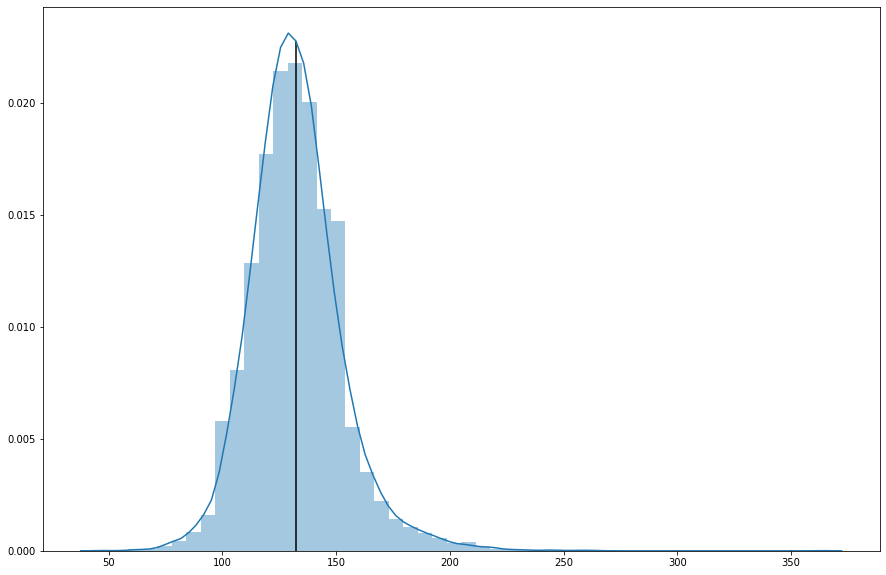

In [9]:
plt.subplots(figsize=(15,10))
p = sns.distplot(data[:,0])
#sns.kdeplot(data[:,1])

# https://stackoverflow.com/a/28958609/844372
x,y = p.get_lines()[0].get_data()

#care with the order, it is first y
#initial fills a 0 so the result has same length than x
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()

x_median = x[nearest_05]
y_median = y[nearest_05]

plt.vlines(x_median, 0, y_median)
plt.show()

In [7]:
print("Median: {}".format(x_median))

Median: 132.36559652187154
